In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/question-answer/Dataset_Python_Question_Answer.csv
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/config.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/tokenizer.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/metadata.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/model.weights.h5
/kaggle/input/gemma/keras/gemma_instruct_2b_en/2/assets/tokenizer/vocabulary.spm
/kaggle/input/data-assistants-with-gemma/submission_categories.txt
/kaggle/input/data-assistants-with-gemma/submission_instructions.txt


In [2]:
import time
from time import gmtime, strftime
start = time.time()
print("GMT : ",time.strftime("%a, %d %b %Y %I:%M:%S %p %Z", time.gmtime()))

GMT :  Sat, 30 Mar 2024 10:18:41 AM GMT


In [3]:
import sklearn
print(sklearn.__version__)
!python --version

1.2.2
Python 3.10.13


In [4]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('/kaggle/input/question-answer/Dataset_Python_Question_Answer.csv')

In [6]:
dataset.shape

(419, 2)

In [7]:
pd.set_option("display.max_colwidth", 3000)

In [8]:
dataset.sample(5)

,Question,Answer
227,How can you define private and public methods in Python?,"[""Sure, here's an explanation on how to define private and public methods in Python:"", '**Private methods** are methods that are defined inside a class and are not accessible from outside the class. They are accessible only to objects of that class.', '**Public methods** are methods that are defined outside a class and can be accessed from anywhere. They are accessible to both objects of that class and objects of other classes.', ""Here's an example to illustrate the difference between private and public methods:"", '```python', 'class Person:', ' def __init__(self, name):', ' self.name = name', ' private method_1():', ' print(""Private method called."")', ' public method_2():', ' print(""Public method called."")', 'person = Person(""John"")', 'person.method_1() # Output: ""Private method called.""', 'person.method_2() # Output: ""Public method called.""', '```', 'In this example, the `__init__` method is a private method because it is only accessible from within the `Person` class. The `method_1` method is also private because it is not accessible from outside the `Person` class. The `method_2` method is a public method because it is accessible from anywhere.', 'Here are some of the differences between private and public methods:', '* **Access control:** Private methods are only accessible from within the class, while public methods can be accessed from anywhere.', '* **Visibility:** Private methods are not visible outside the class, while public methods are visible to all objects that can access the class.', '* **Inheritance:** Private methods cannot be inherited by subclasses, while public methods can be inherited by subclasses.', '**When to use private and public methods**', 'You should use private methods to enforce data security and protect sensitive information. You should use public methods when you need to share functionality with objects that have access to the class.']"
223,How can you define decorators in Python to modify the execution flow of a function?**,"[""Sure! Here's how you define decorators in Python to modify the execution flow of a function:"", '```python', 'def decorator(function):', ' """"""', ' This function defines a decorator that will modify the execution flow of the given function.', ' """"""', ' def wrapper(*args, **kwargs):', ' # This method gets called whenever the function is called with arguments and keyword arguments.', ' print(""Before calling the original function."")', ' result = function(*args, **kwargs)', ' print(""After calling the original function."")', ' return result', ' return wrapper', '@decorator', 'def my_function():', ' """"""', ' This is the function to be decorated.', ' """"""', ' print(""This is the main function."")', 'if __name__ == ""__main__"":', ' my_function()', '```', '**Explanation:**', '1. The `decorator` function takes a function as its argument and returns another function.', '2. This decorated function acts as a wrapper for the original function.', '3. When `my_function` is called, the decorator intercepts the call before it executes the original function.', '4. It prints a message before and after calling the original function.', '**Output:**', 'When you run the code:', '```', 'Before calling the original function.', 'This is the main function.', 'After calling the original function.', '```', '**Note:**', 'Decorators can modify the execution flow of a function in various ways, including:', '- Modifying function arguments and return values.', '- Adding additional tasks to the function execution.', ""- Changing the function's behavior."", '- Caching the function results.']"
38,What is the difference between `append` and `insert` methods?,"[""Sure, here's the difference between the `append` and `insert` methods:"", '**Append**', '* Adds an element to the end of a list.', '* The new element is placed after the last element in the list.', '* `append` modifies the original list in place.

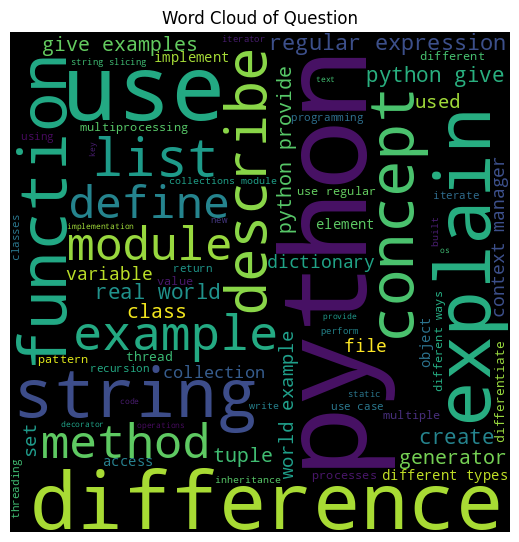

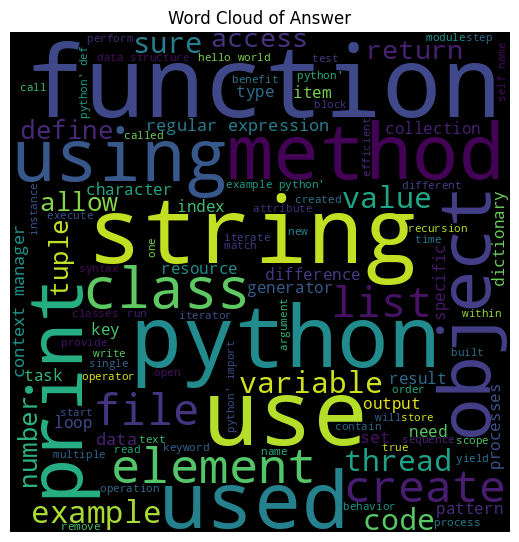

In [9]:
comment_words = ''
stopwords = set(STOPWORDS)
#print(stopwords)

columns=list(dataset)
for col in columns:
    for val in dataset[col]:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()     
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 500, height = 500,
                    background_color ='black',
                    stopwords = stopwords,      
                    min_font_size = 8).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    title="Word Cloud of " + col
    plt.title(title)
    plt.show()

In [10]:
%%capture
!pip install -U keras-nlp
!pip install -q -U keras>=3

In [11]:
%%capture
# The %%capture magic command is used to suppress the output of the cell.

import pandas as pd
# Importing the pandas library as pd. Pandas is a powerful data manipulation and analysis library.

from tqdm.notebook import tqdm
# Importing tqdm from the notebook submodule of the tqdm library. tqdm is used for creating progress bars in loops.

tqdm.pandas() 
# Configuring tqdm to work with pandas, allowing progress bars for operations on pandas objects.

import numpy as np
# Importing the numpy library as np. Numpy is a fundamental package for scientific computing in Python.

import re
# Importing the re module. re is Python's regular expression module, used for pattern matching in strings.

import matplotlib.pyplot as plt
# Importing the pyplot module from the matplotlib library as plt. Matplotlib is a plotting library for Python.

import keras
# Importing the keras library. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

import keras_nlp
# Importing the keras_nlp library. This likely contains additional tools or utilities specific to natural language processing tasks in Keras.

from IPython.display import display, Markdown
# Importing display and Markdown classes from IPython.display module. This allows displaying rich content and Markdown text in the notebook.

2024-03-30 10:19:26.116837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 10:19:26.116986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 10:19:26.278504: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
import os
# Importing the os module. This module provides a way to interact with the operating system.

os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow"
# Setting the environment variable "KERAS_BACKEND" to "jax". This specifies the backend for Keras, which determines the library used for tensor operations and training neural networks. Options include "jax", "torch", or "tensorflow".

# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"
# Setting the environment variable "XLA_PYTHON_CLIENT_MEM_FRACTION" to "1.00". This is specific to the JAX backend and is used to configure the memory allocation fraction for XLA (Accelerated Linear Algebra) computations in JAX. This can help avoid memory fragmentation issues.

In [13]:
%%capture
# The %%capture magic command is used to suppress the output of the cell.

#gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")
# Creating a GemmaCausalLM (language model) instance using the "gemma_2b_en" preset. This line is commented out.

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_instruct_2b_en")
# Creating a GemmaCausalLM (language model) instance using the "gemma_instruct_2b_en" preset.

gemma_lm.summary()
# Generating a summary of the GemmaCausalLM model.

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


In [14]:
gemma_lm.compile()

In [15]:
template = "Instruction:\n{instruction}\n\nResponse:\n{response}"

In [16]:
prompt = template.format(
    instruction="How many Keywords are there in Python programming language?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

I0000 00:00:1711794105.933119      18 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-03-30 10:21:45.979605: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


Instruction:
How many Keywords are there in Python programming language?

Response:
The Python programming language has **6 Keywords** by default. They are:

* `if`
* `else`
* `for`
* `in`
* `pass`
* `raise`


In [17]:
"""import keyword

print(keyword.kwlist)"""
#['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']

'import keyword\n\nprint(keyword.kwlist)'

In [18]:
prompt = template.format(
    instruction="What are the key features of Python?.",
    response="",
)
print(gemma_lm.generate(prompt, max_length=512))

Instruction:
What are the key features of Python?.

Response:
**Key Features of Python:**

**1. Dynamic Typing:**
- Python is dynamically typed, meaning you don't need to explicitly declare the type of variables.
- This allows for faster development and reduces the need for type errors.

**2. High-Level Language:**
- Python is an interpreted language, meaning the compiled code is executed directly on the machine.
- This allows for faster execution compared to compiled languages like C++ and Java.

**3. Object-Oriented Programming (OOP):**
- Python supports object-oriented programming, which allows you to create and work with objects.
- This enables you to organize your code using classes and objects, making it easier to maintain and extend.

**4. Extensive Standard Library:**
- Python has an extensive standard library that provides built-in functions and modules to perform various tasks, such as data manipulation, string manipulation, networking, and more.

**5. Regular Expressions:**


In [19]:
prompt = template.format(
    instruction="What is tuple in Python?.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
What is tuple in Python?.

Response:
A tuple is a built-in data type in Python that is an ordered collection of elements. It is a mutable data structure, meaning that its elements can be changed after the tuple is created. Tuples are defined using square brackets, with the elements separated by commas.

Here are some examples of tuples:

```python
tuple1 = (1, 2, 3, 4, 5)
tuple2 = ("hello", "world")
```

Tuples have a number of useful features, including:

* **Ordered elements:** Tuples are ordered, which means that the elements are accessed in the order they are inserted.
* **Mutable:** Tuples are mutable, meaning that their elements can be changed after the tuple is created.
* **Type safety:** Tuples are type-safe, which means that they can only contain elements of the same type. This helps to prevent errors at runtime.

Tuples are a versatile data structure that can be used for a variety of tasks, including:

* **Composing and passing data structures:** Tuples can be us

In [20]:
# Enable LoRA for the model and set the LoRA rank to 4/8/12/16/...
# This comment describes the purpose of the following code: enabling LoRA (Local Rank Adaptation) for the model and setting the LoRA rank to one of the specified values (4, 8, 12, or 16).

gemma_lm.backbone.enable_lora(rank=4)
# Enabling LoRA for the backbone of the GemmaCausalLM model with a specified rank of 4. LoRA is a technique used for adapting the local ranks of layers in a neural network.

gemma_lm.summary()
# Generating a summary of the GemmaCausalLM model after enabling LoRA. This summary provides information about the architecture and parameters of the model.

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,507,536,384 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,507,536,384 (9.34 GB)

 Trainable params: 1,363,968 (5.20 MB)

 Non-trainable params: 2,506,172,416 (9.34 GB)

In [21]:
gemma_lm.preprocessor.sequence_length = 128

In [22]:
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-6,
    weight_decay=0.01,
)

In [23]:
#join dataset columns
output=pd.DataFrame(columns=["QA"])
output=dataset["Question"]+dataset["Answer"]

In [24]:
# Exclude layernorm and bias terms from decay.
# This comment describes the purpose of the following code: to exclude layernorm and bias terms from weight decay during optimization.

# optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])
# This line of code is commented out and seems to be intended to configure the optimizer to exclude certain variables (specifically, "bias" and "scale") from weight decay. However, it is not directly executed in this snippet.

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
# Compiling the GemmaCausalLM model with a specified loss function, optimizer, and metrics. This prepares the model for training.

gemma_lm.fit(output, epochs=1, batch_size=1)
# Training the GemmaCausalLM model for one epoch using the provided training data (output). The batch size is set to 1, indicating that each iteration will process a single example.

419/419 ━━━━━━━━━━━━━━━━━━━━ 7815s 18s/step - loss: 2.2550 - sparse_categorical_accuracy: 0.6826


In [25]:
prompt = template.format(
    instruction="What are the key features of Python?.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
What are the key features of Python?.

Response:
**Key Features of Python:**

**1. High-level:**
- Python code is closer to natural language than other programming languages.
- It provides an intuitive syntax and eliminates the need for complex data structures and low-level control flow.

**2. Dynamic Typing:**
- Python is dynamically typed, which means you don't need to explicitly declare the variable type before assigning a value. This allows for faster and easier code development.

**3. Interpreted Language:**
- Python is an interpreted language, meaning the code is executed line by line during runtime. This allows for faster execution and debugging but can make the code less efficient for very large or complex programs.

**4. Object-Oriented Programming:**
- Python supports object-oriented programming (OOP), which allows developers to create and manipulate objects that encapsulate data and code. This paradigm makes code modular, reusable, and maintainable.

**5. Extens

In [26]:
prompt = template.format(
    instruction=" What is PEP 8 in python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
 What is PEP 8 in python?

Response:
PEP 8 is a style guide and linter for Python. It provides recommendations for formatting, indents, and other aspects of Python code. PEP 8 is commonly used in the Python community and is often enforced by code linting tools.


In [27]:
prompt = template.format(
    instruction="Please generate the list of all Keywords of Python language.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Please generate the list of all Keywords of Python language.

Response:
Sure, here is the list of keywords in the Python programming language.

- if
- else
- for
- in
- ifelse
- lambda
- None
- pass
- print
- break
- continue
- while
- function
- class
- module
- global


In [28]:
prompt = template.format(
    instruction="Is Python a strong or weak language?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Is Python a strong or weak language?

Response:
Python is considered a **weak** language.

**Weak languages** have characteristics like:

* **Dynamic typing:** Variable types are not checked at compile time.
* **Dynamic scoping:** The scope of variables is determined at runtime.
* **Low-level:** Python provides direct access to the operating system, giving developers more control over their program.
* **Interpreted:** Python code is executed line by line during runtime.
* **Garbage collection:** Python automatically cleans up unused objects and variables.

These characteristics make it easier for Python to dynamically adapt to changing data types and provide efficient execution. However, this also means that Python code can be more difficult to understand and maintain than that of stronger languages like C++.


In [29]:
prompt = template.format(
    instruction="Explain the concept of metaprogramming in Python.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Explain the concept of metaprogramming in Python.

Response:
Sure. Here is the explanation of the concept of metaprogramming in Python:

**Metaprogramming** is a technique in computer science where the compiler or interpreter itself is programmed to generate or modify source code during the compilation or execution phase. This allows developers to create programs that can dynamically alter the behavior of existing code.

**Key Concepts:**

- **Templates:** Metaprogrammers define a template, which is a generic structure that can be instantiated with specific data types or values. The compiler then generates the actual code based on the template's definition.
- **Metaclasses:** These are special classes that allow us to dynamically modify the behavior of existing classes at runtime. We can define a metaclass that intercepts method invocations and intercepts the original code to perform some specific task before or after the original code is executed.
- **Reflection:** This i

In [30]:
prompt = template.format(
    instruction="How do you use `None` in Python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
How do you use `None` in Python?

Response:
Sure! Here's how you use `None` in Python:

* **Declaration:** You declare `None` with the keyword `None`. It is explicitly assigned the value `None` to a variable, a keyword argument, or an expression.
* **Variable Assignment:** `None` can be assigned to a variable, another variable of the same type, a keyword argument, or an expression.
* **Keyword Arguments:** `None` can be used as a keyword argument, similar to other keyword arguments like `True` and `False`. It indicates that the argument is not provided or omitted.
* **Expressions:** Expressions like `0` and `""` can also be assigned the value `None`.
* **Type:** `None` has the type `NoneType`. It is distinct from the empty string `''` and the numeric `0`.
* **Comparison:** `None` can be used for comparisons. It is equal to itself ( `None == None` is True), but not to empty strings or `0`.
* **Conditional Logic:** `None` can be used in conditional logic statements to check 

In [31]:
prompt = template.format(
    instruction="How do you handle exceptions in Python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
How do you handle exceptions in Python?

Response:
**Exceptions Handling in Python:**

**1. Try-except Blocks:**

```python
try:
    # Code that may raise an error
    pass
except Exception as e:
    # Handle the exception
    print(f"Error: {e}")
```

- The `try` block contains the code you want to execute.
- The `except` block catches any type of exception that occurs.
- The `as` keyword allows you to specify the variable to hold the exception object.

**2. Exception Classes:**

You can define your own exception classes to group multiple exceptions with a common behavior.

```python
class CustomException(Exception):
    pass

# Raise an exception
raise CustomException("Something went wrong")
```

**3. Specific Exceptions:**

You can handle specific exceptions by checking the type of the exception object.

```python
try:
    # Code that may raise a ValueError
    pass
except ValueError:
    # Handle the ValueError
    print("Value must be a number")
```

**4. Nested Try-e

In [32]:
prompt = template.format(
    instruction="Explain the concept of recursion in Python with an example.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=1024))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Explain the concept of recursion in Python with an example.

Response:
Sure! Here's a comprehensive explanation of recursion in Python with an example:

**What is Recursion?**
Recursion is a programming technique that allows a function to call itself. This self-referential calling can happen until a base case is reached, stopping the recursion process.

**Example:**
The following is an example of recursion in Python:

```python
def factorial(n):
  """
  This function calculates the factorial of a number n.
  """
  if n == 0:
    return 1  # Base case: factorial of 0 is defined as 1.
  elif n == 1:
    return 1  # Base case: factorial of 1 is defined as 1.
  else:
    return n * factorial(n-1)

print(factorial(5))
```

**How the Example Works:**

1. The `factorial` function takes a single argument, `n`.
2. If `n` is 0 or 1, it calculates the factorial as 1.
3. If `n` is greater than 1, it recursively calls itself with `n-1` as the argument.
4. The function continues this re

In [33]:
prompt = template.format(
    instruction="Describe the differences between `collections` and `OrderedDict",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
Describe the differences between `collections` and `OrderedDict

Response:
Sure! Here is the difference between `collections` and `OrderedDict`:

**collections**

* It is a module in the Python standard library.
* It provides a collection of data structures, including lists, tuples, dictionaries, sets, and iterators.
* These collections are unordered, meaning they do not preserve the order of their elements.
* They support operations such as indexing, slicing, and iteration.

**OrderedDict**

* It is a subclass of `collections.OrderedDict`.
* It inherits all the methods and attributes of `collections.OrderedDict`, along with the ability to store elements in an ordered manner.
* The `OrderedDict` class maintains the order of its elements in a dictionary-like structure.
* It supports operations such as key-based access and iteration in the order they were inserted.

In summary, `collections` is a more general module that provides a wider range of data structures, while `Orde

In [34]:
prompt = template.format(
    instruction="What are the differences between `def` and `function` in python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

Instruction:
What are the differences between `def` and `function` in python?

Response:
Sure, here's an explanation of the differences between `def` and `function` keyword in Python:

**`def`:**

* A `def` function definition is used to define a new function object.
* The syntax of a `def` function definition is: `function_name(parameter_1, parameter_2, ...) -> return_type`:
    * `function_name` is the name of the function.
    * `parameter_1, parameter_2, ...` are the parameters of the function.
    * `return_type` is the type of data the function should return.
* A `def` function definition can be used only once per file.
* When you call a function defined with `def`, you can use the `function_name` identifier instead of the `function` object directly.

**`function`:**

* A `function` keyword is a built-in function that can be called without first creating an object.
* The syntax of the `function` keyword is just `function_name(parameter_1, parameter_2, ...) -> return_type`.
* Ther

In [35]:
end = time.time()
# Capturing the current time after the execution of the program or a specific portion of the code.

print("The time of execution of above program is :",(end-start) * 10**3, "ms")
# Calculating and printing the execution time of the program or a specific portion of the code in milliseconds.

print("GMT : ",time.strftime("%a, %d %b %Y %I:%M:%S %p %Z", time.gmtime()))
# Printing the current GMT time using the time.strftime() function with the specified format ("%a, %d %b %Y %I:%M:%S %p %Z").
# The time.gmtime() function returns the current time in GMT.

The time of execution of above program is : 16128043.586730957 ms
GMT :  Sat, 30 Mar 2024 02:47:29 PM GMT
